In [62]:
import pandas as pd 
import numpy as np
df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [63]:
df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)
df = df.drop('Product ID', axis=1)
test_df = test_df.drop('Product ID', axis=1)


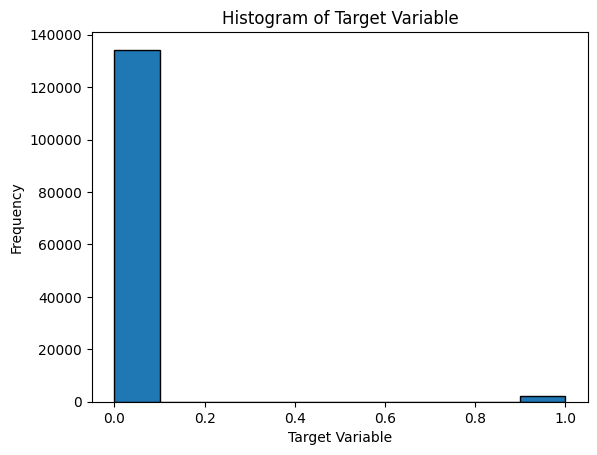

In [64]:
import matplotlib.pyplot as plt
target_variable = df['Machine failure']
plt.hist(target_variable, bins=10, edgecolor='black')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show() # 0 no stone 1 stone

In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data to obtain numerical labels
df["type"] = label_encoder.fit_transform(df["Type"])
df.drop("Type",axis=1, inplace=True)

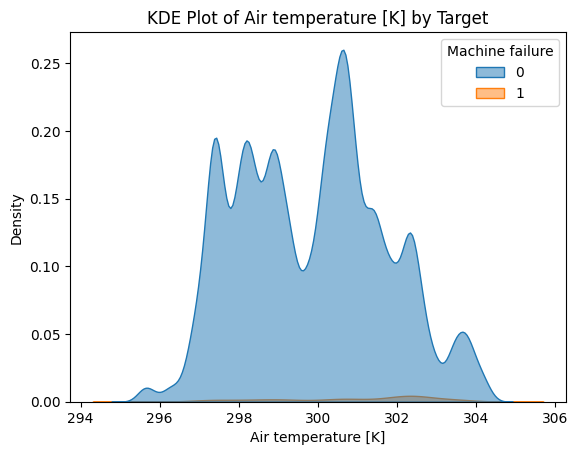

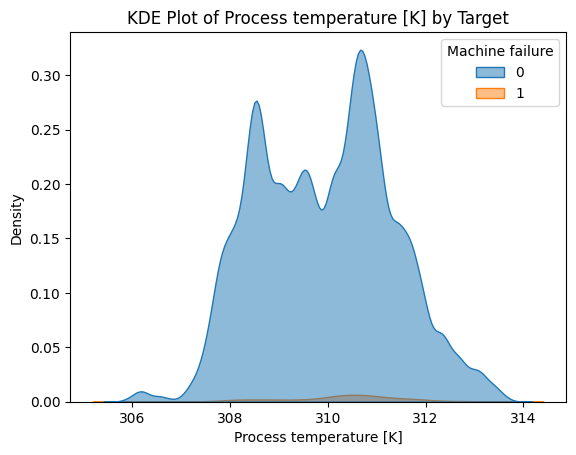

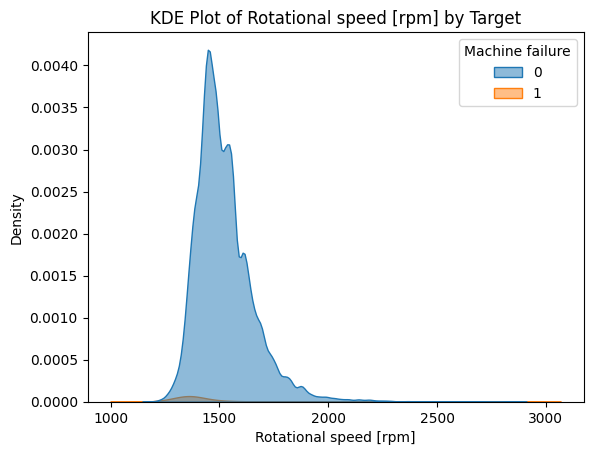

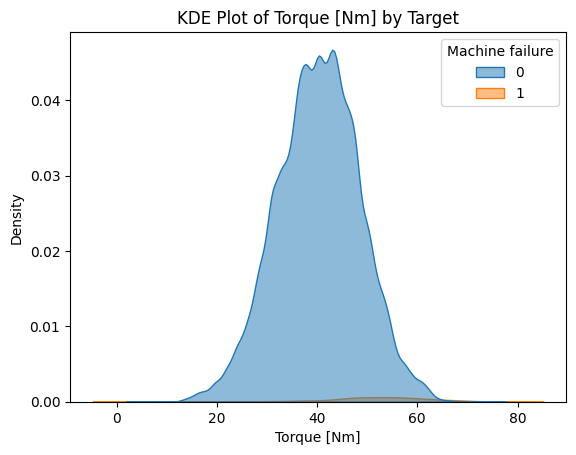

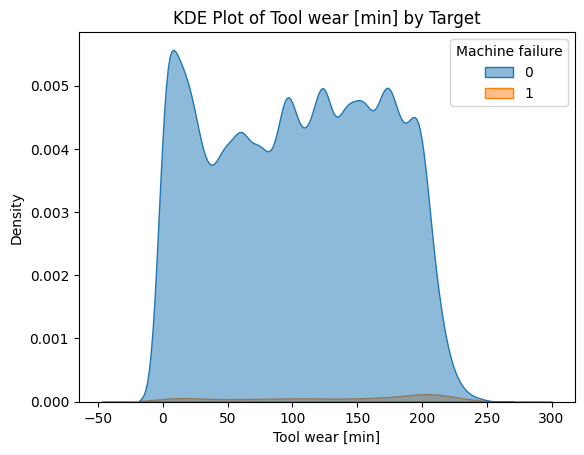

C:\Users\moham\AppData\Local\Temp\ipykernel_18476\2524899203.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue='Machine failure', fill=True, alpha=0.5)


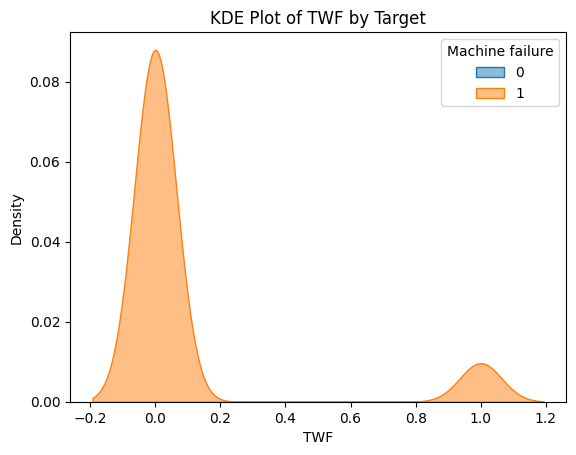

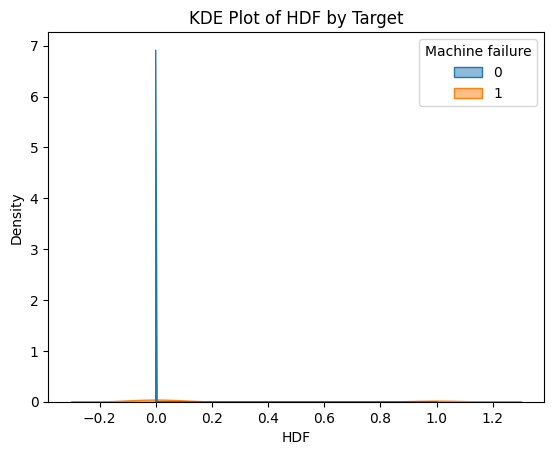

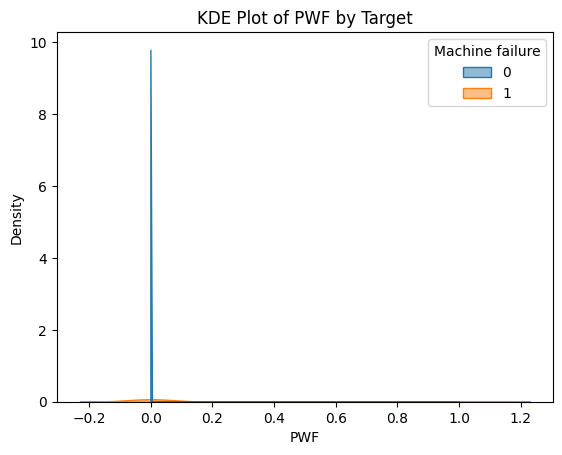

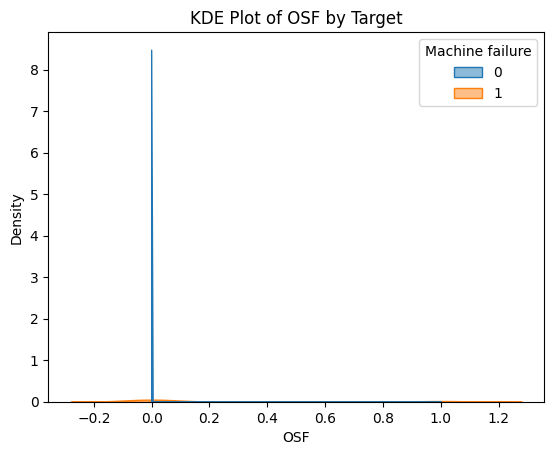

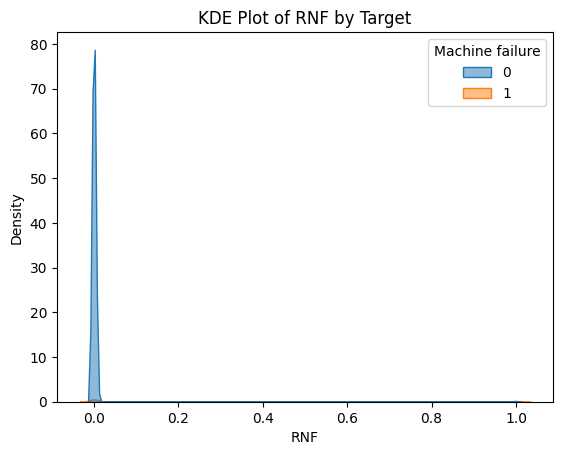

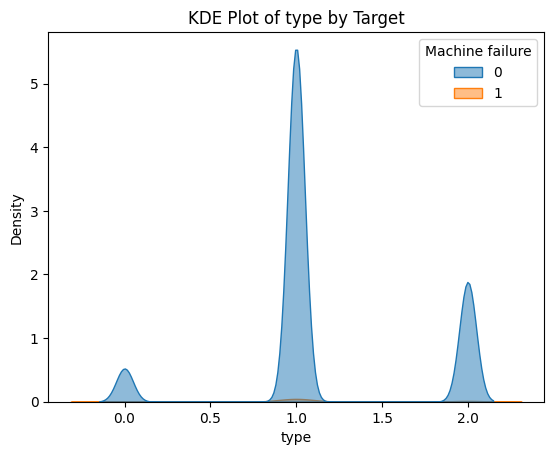

In [66]:
import seaborn as sns
features = df.drop('Machine failure', axis=1)
target = df['Machine failure']

# Plot KDE for each feature relative to the target
for feature in features.columns:
    sns.kdeplot(data=df, x=feature, hue='Machine failure', fill=True, alpha=0.5)
    plt.title(f"KDE Plot of {feature} by Target")
    plt.show()

In [67]:
cases_count = df['Machine failure'].value_counts()
print(cases_count)

Machine failure
0    134281
1      2148
Name: count, dtype: int64


In [68]:
#great imbalance in the dataset

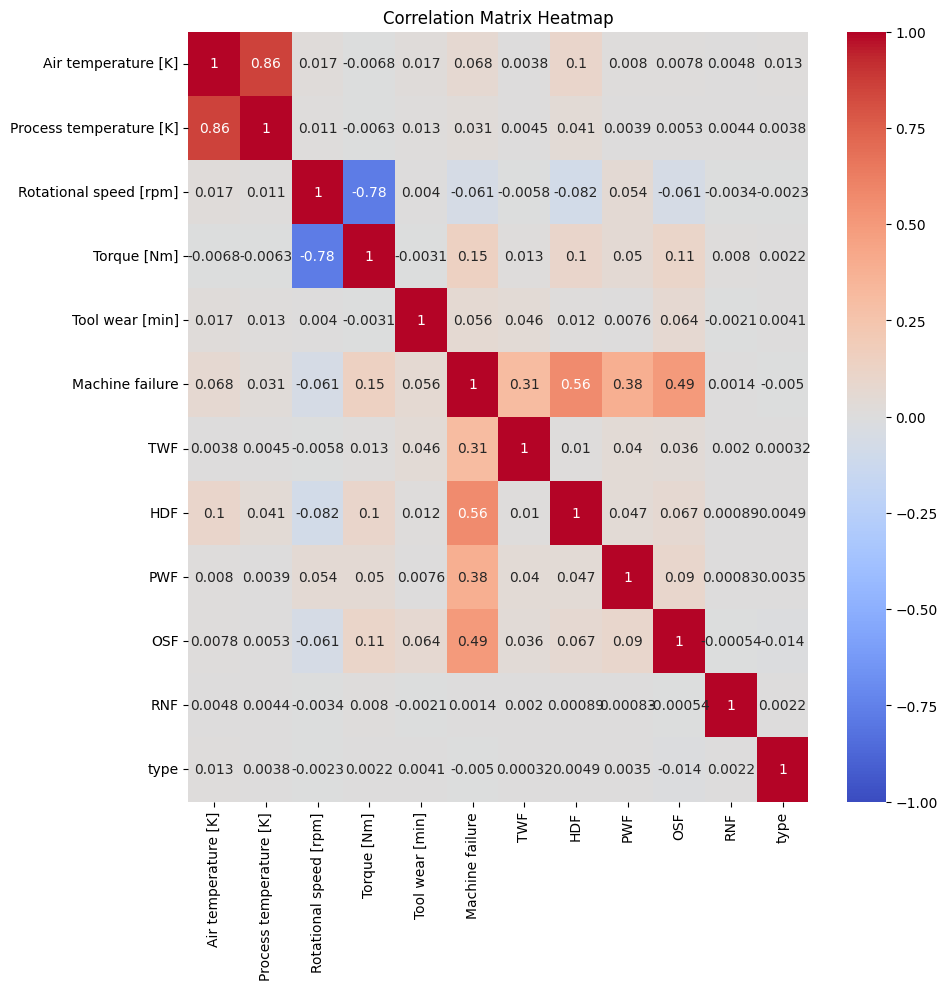

In [69]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [70]:
y_train=df[["Machine failure"]].copy()
y_train.head()

,Machine failure
id,
0,0
1,0
2,0
3,0
4,0


In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
df = df.drop('Machine failure', axis=1)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(df, y_train)



In [74]:
X_train_resampled.head()
y_train_resampled.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [75]:
cases_count = y_train_resampled['Machine failure'].value_counts()
print(cases_count)


Machine failure
0    134281
1    134281
Name: count, dtype: int64


In [78]:
X_train_resampled.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,type
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,1
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,2
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,1
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,1
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,2


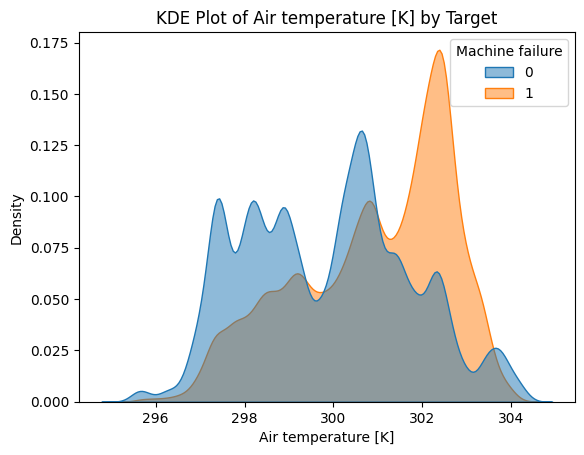

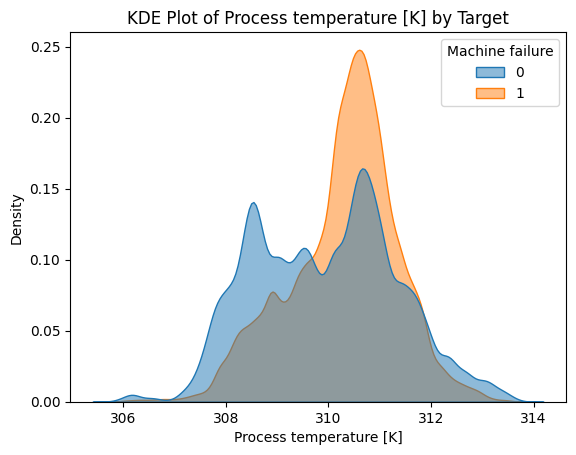

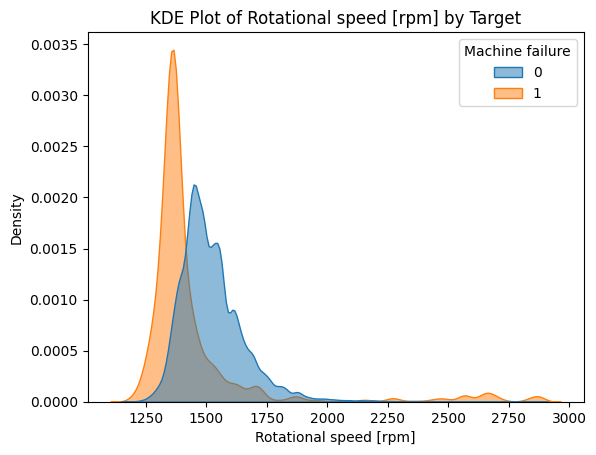

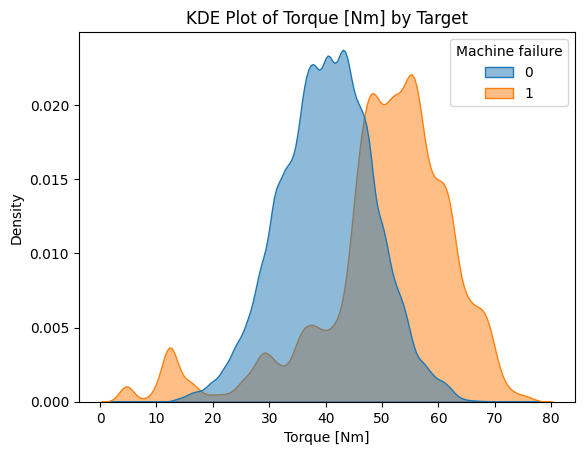

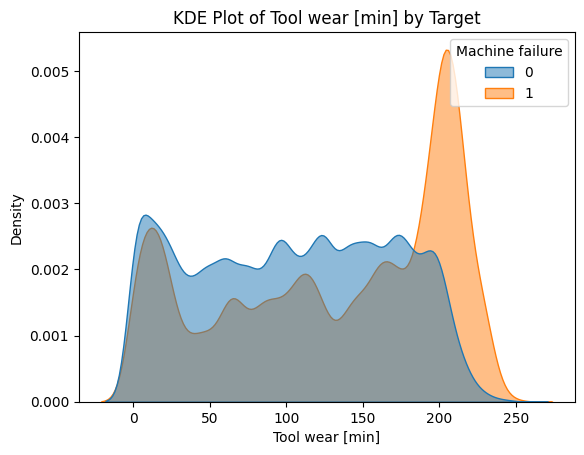

C:\Users\moham\AppData\Local\Temp\ipykernel_18476\1325279280.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X_train_resampled, x=feature, hue=y_train_resampled['Machine failure'], fill=True, alpha=0.5)


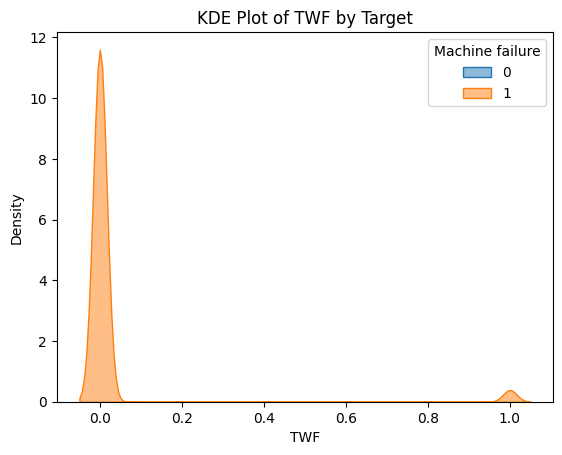

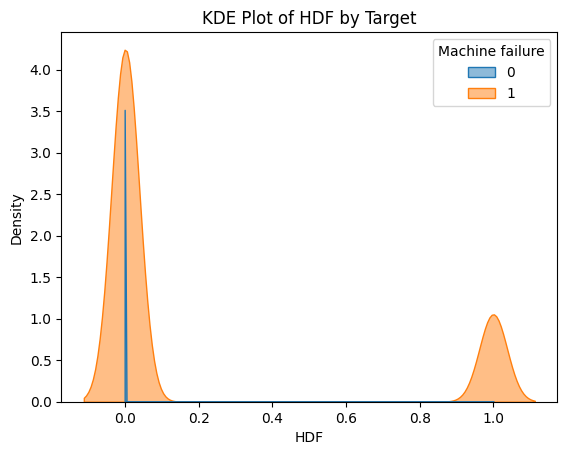

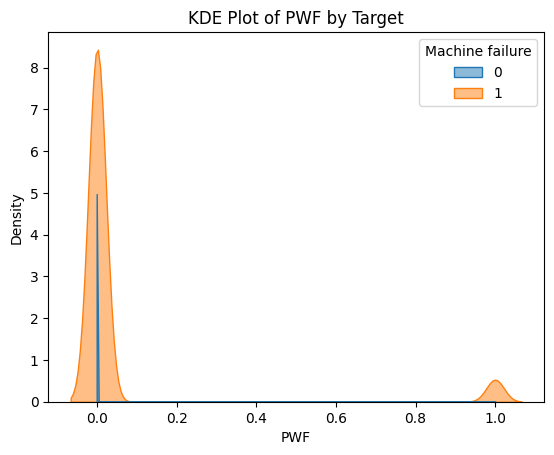

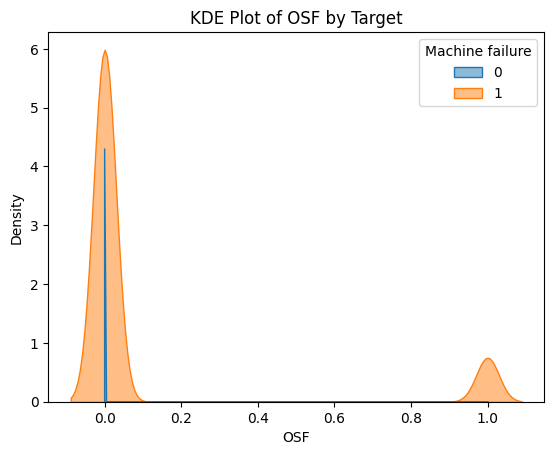

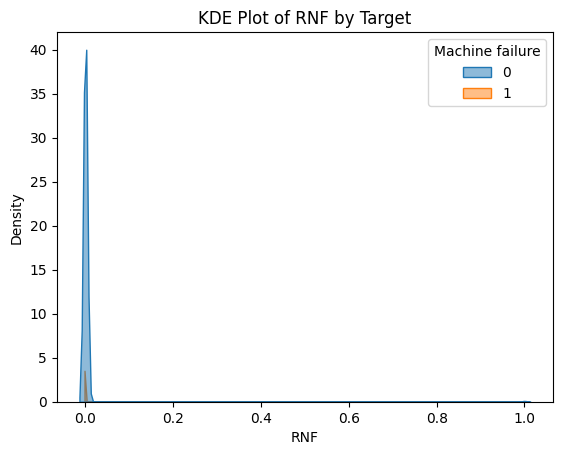

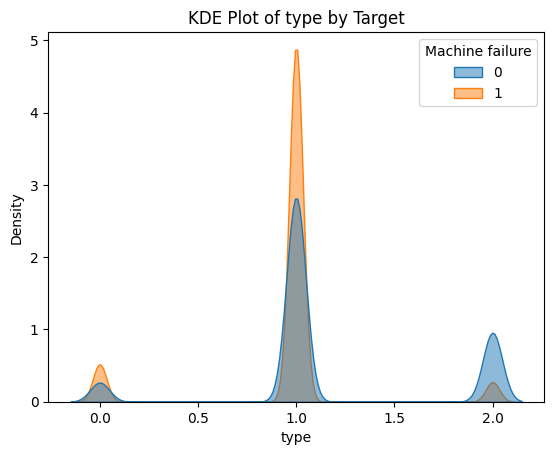

In [79]:
import seaborn as sns
# features = df.drop('Machine failure', axis=1)
# target = df['Machine failure']

# Plot KDE for each feature relative to the target
for feature in X_train_resampled.columns:
    sns.kdeplot(data=X_train_resampled, x=feature, hue=y_train_resampled['Machine failure'], fill=True, alpha=0.5)
    plt.title(f"KDE Plot of {feature} by Target")
    plt.show()

In [80]:
test_df["type"] = label_encoder.fit_transform(test_df["Type"])
test_df.drop("Type",axis=1, inplace=True)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

# Create the GridSearchCV instance

# Fit the grid search to the training data
rf.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found by grid search

# Get the best estimator from the grid search

# Make predictions on the test data using the best model
predictions = rf.predict(test_df)

# Evaluate the accuracy of the best model


C:\Users\moham\AppData\Local\Temp\ipykernel_18476\3883010789.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_resampled, y_train_resampled)


In [58]:
unique_values = y_train_resampled['Machine failure'].unique()
print("Unique values in 'Column1':", unique_values)

Unique values in 'Column1': [0 1]


In [84]:
unique_values = np.unique(predictions)

print("Unique values in the array:", unique_values)

Unique values in the array: [0 1]


In [91]:
test_df2=pd.read_csv("test.csv")
id2=test_df2[["id"]].copy()
id2['Machine failure'] = predictions
id2.head()

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0


In [92]:
id2.set_index('id', inplace=True)
id2.head()

,Machine failure
id,
136429,0
136430,0
136431,0
136432,0
136433,0


In [94]:
id2.to_csv('predictions.csv', index=True)
